In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
from numpy.linalg import inv

In [4]:
df=pd.read_csv("mask.csv",delimiter=",") #import data about mask mandate
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,period,state,cases,death
0,2020-06-05,pre_mask,California,3593,66
1,2020-06-06,pre_mask,California,2637,76
2,2020-06-07,pre_mask,California,2850,27
3,2020-06-08,pre_mask,California,2290,26
4,2020-06-09,pre_mask,California,2958,96


In [5]:
states=['CA','CT','DE','HI','IL','KS','KY','ME','MD','MA','MI','NV','NJ','NM','NY','NC','OR','PA','RI','TX','VA','WA','WV'] #State abbreviation

In [7]:
def LES(X,Y):  #LES algorithm
    t=np.ones(len(X))
    h = np.vstack((X,t)).T
    A=np.matmul(np.matmul(inv(np.matmul(h.T,h)),h.T),Y.T)   
    v=Y-np.matmul(h,A)
    return A

def figure(A,X,Y,type):#1:y=ax+b   2:y=Ax^x+bx+c  3:y=a*e^(bx)
    #draw pic of function
    plt.figure(figsize=(8,6)) 
    plt.scatter(X,Y,color="green",label="data",linewidth=2) 
    
    x=np.linspace(0,5,100) #
    if type==1:
        y=A[0]*x+A[1] 
        plt.plot(x,y,color="red",label="predict",linewidth=2) 
        plt.legend(loc='lower right') 
        print("Function:")
        print("y="+str(round(A[0],5))+"x+"+str(round(A[1],5)))
    elif type==2:
        y=A[0]*x*x+A[1]*x+A[2] 
        plt.plot(x,y,color="red",label="predict",linewidth=2) 
        plt.legend(loc='lower right') 
        print("Function:")
        print("y="+str(round(A[0],5))+"x^2+"+str(round(A[1],5))+"x+"+str(round(A[2],5)))
    elif type==3:
        y=A[1]*np.exp(A[0]*x) 
        plt.plot(x,y,color="red",label="predict",linewidth=2) 
        plt.legend(loc='lower right') 
        print("Function:")
        print("y="+str(round(A[0],5))+"e^("+str(round(A[1],5))+"x)")
    plt.show()
    return 0

def cal(state_name,df):#print the slop before and after mandate & calculate the efficiency parameter
    state_pre = df[
        (df['period'] == 'pre_mask') #first filter for period (after)
        & (df['state'] == state_name) #second filter for state (before)
     ]
    state_post =df[
        (df['period'] == 'post_mask') # first filter for period (after)
        & (df['state'] == state_name)] # second filter for perid (before)
    x=[i for i in range(0,len(state_pre))]
    A1=LES(x,state_pre['cases'])
    print("state:"+state_name)
    print("mask_pre:")
    print("y="+str(round(A1[0],5))+"x+"+str(round(A1[1],5)))

    x=[i for i in range(0,len(state_post))]
    A2=LES(x,state_post['cases'])

    print("mask_post:")
    print("y="+str(round(A2[0],5))+"x+"+str(round(A2[1],5)))
    return A2[0]-A1[0]


In [8]:
state=df['state'].unique()
k=[]
i=0
for s in state:
    k.append(cal(s,df))
    print("efficiency paramenter="+str(k[i]))#print the slop before and after mandate & calculate the efficiency parameter
    i=i+1

    

state:California
mask_pre:
y=59.15604x+2773.91429
mask_post:
y=283.32088x+5067.48571
efficiency paramenter=224.1648351648352
state:Connecticut
mask_pre:
y=12.86813x+838.42857
mask_post:
y=-4.34286x+628.37143
efficiency paramenter=-17.210989010989007
state:Delaware
mask_pre:
y=14.81538x+92.91429
mask_post:
y=0.54066x+172.34286
efficiency paramenter=-14.274725274725279
state:Hawaii
mask_pre:
y=-0.9956x+20.25714
mask_post:
y=-0.07692x+2.14286
efficiency paramenter=0.9186813186813185
state:Illinois
mask_pre:
y=109.32747x+1323.65714
mask_post:
y=-36.65275x+2563.17143
efficiency paramenter=-145.98021978021976
state:Kansas
mask_pre:
y=26.74505x+100.94286
mask_post:
y=8.76264x+412.25714
efficiency paramenter=-17.982417582417586
state:Kentucky
mask_pre:
y=-2.65495x+200.4
mask_post:
y=4.45275x+122.05714
efficiency paramenter=7.107692307692306
state:Maine
mask_pre:
y=0.74725x+16.28571
mask_post:
y=0.06813x+39.91429
efficiency paramenter=-0.6791208791208788
state:Maryland
mask_pre:
y=13.86374x+570

average of Efficiency parameters:-21.752030578117534


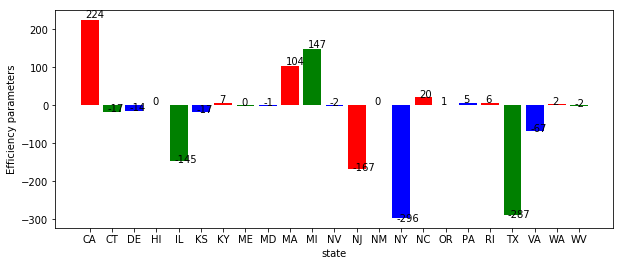

In [10]:
print("average of Efficiency parameters:"+str(np.mean(k)))

def autolabel(rects):#draw pic of each element's value
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x()+rect.get_width()/2.- 0.2, 1.03*height, '%s' % int(height))
name_list = states
num_list = k
plt.xlabel("state")
plt.ylabel("Efficiency parameters")
autolabel(plt.bar(range(len(num_list)), num_list, color='rgb', tick_label=name_list))
params = {
    'figure.figsize': '10, 4'
}
plt.rcParams.update(params)
plt.show()


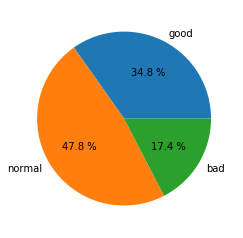

In [11]:
level=[]
num=[0,0,0]
for i in k:#classification standard of the effect of mask mandate
    if i<=-10:
        level.append('good')
        num[0]+=1
    elif i<=10:
        level.append('normal')
        num[1]+=1
    else:
        level.append('bad')
        num[2]+=1

name_list = ['good','normal','bad']
plt.axes(aspect=1) #draw pic to show the proportion of the effect of mask mandate in all states
plt.pie(x=num, labels=name_list, autopct='%3.1f %%')
plt.show()


In [21]:
population=pd.read_csv("US_pop.csv")#import American population
Infection_rate=[]
for i in state:
    sum=0
    for j in range(len(df)):
        if df['state'][j]==i:
            sum=sum+df['cases'][j]
    total=0
    for x in range(len(population)):
        if population['state'][x]==i:
            total=population['population'][x]
            break
    Infection_rate.append(sum/total)
Infection_rate = [(x - min(Infection_rate))/(max(Infection_rate) - min(Infection_rate)) for x in Infection_rate]#Min-Max Normalization
Infection_rate

[0.3378840759419173,
 0.6029128906030479,
 0.48351364888346793,
 0.0,
 0.4727975224532459,
 0.3394288346401531,
 0.09438136031357652,
 0.048243823501624254,
 0.3536178884010812,
 0.596789222312812,
 0.11095775596379055,
 0.4893159487463825,
 1.0,
 0.17187422611675907,
 0.9646039169969823,
 0.38893791170752934,
 0.159414822233343,
 0.28847140974948476,
 0.44689706655498784,
 0.740063499268497,
 0.25327017764874976,
 0.19010814770890858,
 0.13895251270345216]

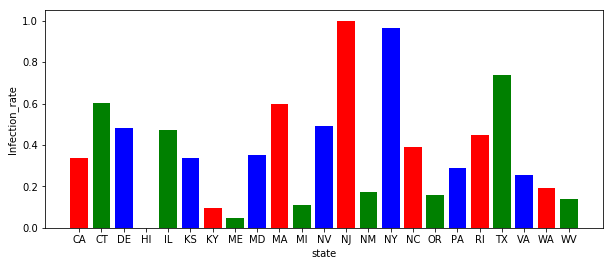

In [22]:
def autolabel_2(rects):#draw pic of each element's value without text
    for rect in rects:
        height = rect.get_height()
name_list = states
num_list = Infection_rate
plt.xlabel("state")
plt.ylabel("Infection_rate")
autolabel_2(plt.bar(range(len(num_list)), num_list, color='rgb', tick_label=name_list))
params = {
    'figure.figsize': '10, 4'
}
plt.rcParams.update(params)
plt.show()#Visualize the infection rate

In [23]:
i_r_level=[]
for i in Infection_rate:#classification standard of infection rate
    if i<=0.2:
        i_r_level.append('low')
    elif i<=0.45:
        i_r_level.append('medium')
    else:
        i_r_level.append('high')


In [24]:
hospital=pd.read_csv("hospital.csv")#import data about hospital and staffed bed
case_bed=[] #how many hospitals per each case
for i in state:
    sum=0
    for j in range(len(df)):
        if df['state'][j]==i:
            sum=sum+df['cases'][j]
    total=0
    for x in range(len(hospital)):
        if hospital['state'][x]==i:
            total=hospital['Staffed_Beds'][x]
            break
    case_bed.append(sum/int(total)) #how many patient in each bed

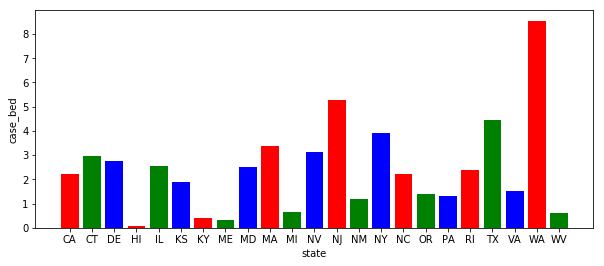

In [25]:
name_list = states
num_list = case_bed
plt.xlabel("state")
plt.ylabel("case_bed")
autolabel_2(plt.bar(range(len(num_list)), num_list, color='rgb', tick_label=name_list))
params = {
    'figure.figsize': '10, 4'
}
plt.rcParams.update(params)
plt.show()#Visualize cases per bed

In [26]:
c_b_level=[]
for i in case_bed:#classification standard of cases per bed
    if i<=1.5:
        c_b_level.append('vacant')
    elif i<=3.5:
        c_b_level.append('normal')
    else:
        c_b_level.append('redundant')

In [27]:
US_density=pd.read_csv("density.csv") #import the data of American population density
density=[] 
for i in state:
    for x in range(len(US_density)):
        if US_density['state'][x]==i:
            t=US_density['density'][x]
            break
    density.append(t) 

In [28]:
d_level=[]
for i in density:#classification standard of American population density
    if i<=100:
        d_level.append('low density')
    elif i<=250:
        d_level.append('normal density')
    else:
        d_level.append('high density')

In [29]:
US_temperature=pd.read_csv("temperature.csv")#import the data of temperature
temperature=[] 
for i in state:
    for x in range(len(US_temperature)):
        if US_temperature['State'][x]==i
            t=US_temperature['Rank'][x]
            break
    temperature.append(t) 

In [30]:
t_level=[]
for i in temperature:#classification standard of temperature
    if i<=16:
        t_level.append('hot')
    elif i<=34:
        t_level.append('warm')
    else:
        t_level.append('cold')



In [31]:
state_k=np.vstack((state,level,i_r_level,c_b_level,d_level,t_level)).T # assemble all the attribute

In [32]:
df = pd.DataFrame(state_k, columns=["state", "effect_of_mask", "infection_rate", "cases_per_bed", "density","temperature"])
df

,state,effect_of_mask,infection_rate,cases_per_bed,density,temperature
0,California,bad,medium,normal,high density,hot
1,Connecticut,good,high,normal,high density,warm
2,Delaware,good,high,normal,high density,hot
3,Hawaii,normal,low,vacant,normal density,hot
4,Illinois,good,high,normal,normal density,warm
5,Kansas,good,medium,normal,low density,warm
6,Kentucky,normal,low,vacant,normal density,hot
7,Maine,normal,low,vacant,low density,cold
8,Maryland,normal,medium,normal,high density,warm
9,Massachusetts,bad,high,normal,high density,cold


In [33]:
for i in range(23):
    for j in range(23):
        if df['effect_of_mask'][i]!=df['effect_of_mask'][j]:
            if df['infection_rate'][i]==df['infection_rate'][j]:
                if df['cases_per_bed'][i]==df['cases_per_bed'][j]:
                    if df['density'][i]==df['density'][j]:
                        if df['temperature'][i]==df['temperature'][j]:
                            print(df['state'][i]+'&'+df['state'][j])
#estimate if the data in the table can output a decision tree
#if there are no two state with all the same attribute have different effect of mask mandate, there will be no print
#else, if there are prints, it means we need to change the classification standard of the attributes

In [34]:
eps = np.finfo(float).eps
log=np.log2
#define some math data

In [35]:
## claculate entropy on the whole dataset
entropy_node = 0  #Initialize Entropy
values = df.effect_of_mask.unique()  #Unique objects - 'good', 'bad'
for value in values:
    fraction = df.effect_of_mask.value_counts()[value]/len(df.effect_of_mask)  
    entropy_node += -fraction*np.log2(fraction)
entropy_node
# define a function to calculate entropy of each attribute 

def find_entropy_attribute(df, attribute):
    target_variables = df.effect_of_mask.unique()  #This gives all 'good' and 'normal' and 'bad'
    variables = df[attribute].unique()    #This gives different features in that attribute

    entropy_attribute = 0
    for variable in variables:
        entropy_each_feature = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df.effect_of_mask==target_variable]) #numerator
            den = len(df[attribute][df[attribute]==variable])  #denominator
            fraction = num/(den+eps)  #pi
            entropy_each_feature += -fraction*np.log2(fraction+eps) #This calculates entropy for one feature like 'Sweet'
        fraction2 = den/len(df)
        entropy_attribute += -fraction2*entropy_each_feature   #Sums up all the entropy ETaste

    return(abs(entropy_attribute))

In [36]:
# store entropy of each attribute with its name :

a_entropy = {k:find_entropy_attribute(df,k) for k in df.keys()[2:]}
a_entropy


{'infection_rate': 1.0319711953699815,
 'cases_per_bed': 1.0664330595512959,
 'density': 1.3050440187392822,
 'temperature': 1.2176456898141002}

In [37]:
## calculate Info gain of each attribute

def ig(e_dataset,e_attr):
    return(e_dataset-e_attr)

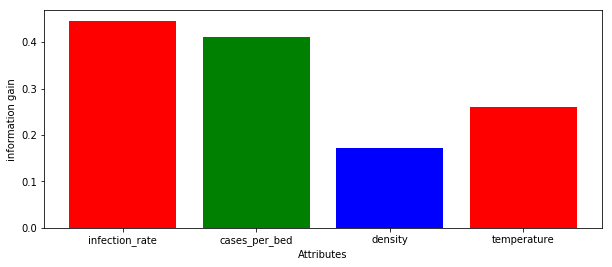

{'infection_rate': 0.4457756387300629,
 'cases_per_bed': 0.4113137745487485,
 'density': 0.17270281536076215,
 'temperature': 0.2601011442859442}

In [38]:

IG = {k:ig(entropy_node,a_entropy[k]) for k in a_entropy}
Ig =[]
for key in IG:
    Ig.append(IG[key])
name_list = df.keys()[2:]
num_list = Ig
plt.xlabel("Attributes")
plt.ylabel("information gain")
autolabel_2(plt.bar(range(len(num_list)), num_list, color='rgb', tick_label=name_list))
params = {
    'figure.figsize': '10, 4'
}
plt.rcParams.update(params)
plt.show()#Visualize IG
IG

In [39]:
## use recursionto proceed tree

def find_entropy(df):
    Class = df.keys()[1]   # target variable class name
    entropy = 0
    values = df[Class].unique()
    for value in values:
        fraction = df[Class].value_counts()[value]/len(df[Class])
        entropy += -fraction*np.log2(fraction)
    return entropy

def find_entropy_attribute(df,attribute):
    Class = df.keys()[1]   # target variable class name
    target_variables = df[Class].unique()  #This gives all 'Yes' and 'No'
    variables = df[attribute].unique()    #This gives different features in that attribute (like 'High','Normal','Low' in income)
    entropy2 = 0
    for variable in variables:
        entropy = 0
        for target_variable in target_variables:
            num = len(df[attribute][df[attribute]==variable][df[Class] ==target_variable])
            den = len(df[attribute][df[attribute]==variable])
            fraction = num/(den+eps)
            entropy += -fraction*log(fraction+eps)
        fraction2 = den/len(df)
        entropy2 += -fraction2*entropy
    return abs(entropy2)

def find_winner(df):
    Entropy_att = []
    IG = []
    for key in df.keys()[2:]:
        IG.append(find_entropy(df)-find_entropy_attribute(df,key))
    return df.keys()[2:][np.argmax(IG)]

def get_subtable(df, node,value):
    return df[df[node] == value].reset_index(drop=True)

def buildTree(df,tree=None): 


    Class = df.keys()[1]   # target variable class name

    #Get attribute with maximum information gain
    node = find_winner(df)
    
    #Get distinct value of that attribute e.g income is node and Low,Normal and High are values
    attValue = np.unique(df[node])
    
    #Create an empty dictionary to create tree    
    if tree is None:                    
        tree={}
        tree[node] = {}
    
    #We make loop to construct a tree by calling this function recursively. 
    #In this we check if the subset is pure and stops if it is pure. 

    for value in attValue:
        
        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable[Class],return_counts=True)                        
        
        if len(counts)==1:#Checking purity of subset
            tree[node][value] = clValue[0]                                                    
        else:        
            tree[node][value] = buildTree(subtable) #Calling the function recursively 
                   
    return tree

mytree=buildTree(df)
mytree


{'infection_rate': {'high': {'density': {'high density': {'temperature': {'cold': {'cases_per_bed': {'normal': 'bad',
        'redundant': 'good'}},
      'hot': 'good',
      'warm': 'good'}},
    'low density': 'normal',
    'normal density': 'good'}},
  'low': {'temperature': {'cold': {'density': {'low density': 'normal',
      'normal density': 'bad'}},
    'hot': 'normal',
    'warm': 'normal'}},
  'medium': {'temperature': {'hot': 'bad',
    'warm': {'density': {'high density': 'normal',
      'low density': 'good',
      'normal density': 'good'}}}}}}

In [40]:
from graphviz import Digraph

def getMaxLeafs(myTree):
    numLeaf = len(myTree.keys())
    for key, value in myTree.items():
        if isinstance(value, dict):
            sum_numLeaf = getMaxLeafs(value)
            if sum_numLeaf > numLeaf:
                numLeaf = sum_numLeaf
    return numLeaf


def plot_model(tree, name):
    g = Digraph("G", filename=name, format='png', strict=False)
    first_label = list(tree.keys())[0]
    g.node("0", first_label)
    _sub_plot(g, tree, "0")
    leafs = str(getMaxLeafs(tree) // 10)
    g.attr(rankdir='LR', ranksep=leafs)
    g.view()


root = "0"


def _sub_plot(g, tree, inc):
    global root

    first_label = list(tree.keys())[0]
    ts = tree[first_label]
    for i in ts.keys():
        if isinstance(tree[first_label][i], dict):
            root = str(int(root) + 1)
            g.node(root, list(tree[first_label][i].keys())[0])
            g.edge(inc, root, str(i))
            _sub_plot(g, tree[first_label][i], root)
        else:
            root = str(int(root) + 1)
            g.node(root, tree[first_label][i])
            g.edge(inc, root, str(i))
            
plot_model(mytree, "mytree.gv")#draw decision tree